# Shubham Kumar Chaturvedi(NLP assigment no: 6)

Q1:What are Vanilla autoencoders

ANS:  the autoencoder is a three layers net, i.e. a neural net with one hidden layer. The input and output are the same, and we learn how to reconstruct the input, for example using the adam optimizer and the mean squared error loss function.autoencoders are used to help reduce the noise in data. Through the process of compressing input data, encoding it, and then reconstructing it as an output, autoencoders allow you to reduce dimensionality and focus only on areas of real value.


Q2: What are Sparse autoencoders

ANS: A Sparse Autoencoder is a type of autoencoder that employs sparsity to achieve an information bottleneck. Specifically the loss function is constructed so that activations are penalized within a layer.A sparse autoencoder is one of a range of types of autoencoder artificial neural networks that work on the principle of unsupervised machine learning. Autoencoders are a type of deep network that can be used for dimensionality reduction – and to reconstruct a model through backpropagation.

Q3: What are Denoising autoencoders

ANS: A Denoising Autoencoder is a modification on the autoencoder to prevent the network learning the identity function. Specifically, if the autoencoder is too big, then it can just learn the data, so the output equals the input, and does not perform any useful representation learning or dimensionality reduction.
Denoising autoencoders are an extension of the basic autoencoder, and represent a stochastic version of it. Denoising autoencoders attempt to address identity-function risk by randomly corrupting input (i.e. introducing noise) that the autoencoder must then reconstruct, or denoise.

The Denoising Autoencoder, which is able to reconstruct corrupted data. Autoencoders are Neural Networks which are commonly used for feature selection and extraction.

Q4: What are Convolutional autoencoders

ANS: Convolutional autoencoders (CAEs) are unsupervised dimensionality reduction models composed by convolutional layers capable of creating compressed image representations.

Q5: What are Stacked autoencoders

ANS: Stacked Autoencoders. Autoencoder is a kind of unsupervised learning structure that owns three layers: input layer, hidden layer, and output layer as shown in Figure 1. The process of an autoencoder training consists of two parts: encoder and decoder.

A stacked autoencoder is a neural network consist several layers of sparse autoencoders where output of each hidden layer is connected to the input of the successive hidden layer. As shown in Figure above the hidden layers are trained by an unsupervised algorithm and then fine-tuned by a supervised method.
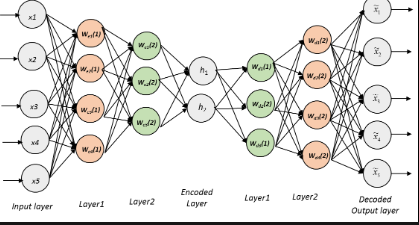

Q6: Explain how to generate sentences using LSTM autoencoders

ANS: 

In [5]:
# lstm autoencoder to recreate a timeseries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
'''
A UDF to convert input data into 3-D
array as required for LSTM network.
'''

def temporalize(X, y, lookback):
    output_X = []
    output_y = []
    for i in range(len(X)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(X[[(i+j+1)], :])
        output_X.append(t)
        output_y.append(y[i+lookback+1])
    return output_X, output_y

# define input timeseries
timeseries = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                       [0.1**3, 0.2**3, 0.3**3, 0.4**3, 0.5**3, 0.6**3, 0.7**3, 0.8**3, 0.9**3]]).transpose()

timesteps = timeseries.shape[0]
n_features = timeseries.shape[1]
timeseries

timesteps = 3
X, y = temporalize(X = timeseries, y = np.zeros(len(timeseries)), lookback = timesteps)

n_features = 2
X = np.array(X)
X = X.reshape(X.shape[0], timesteps, n_features)

X

# DEFINE LSTM AUTOENCODER:

# define modeL
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(RepeatVector(timesteps))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
model.summary()


# fit model
model.fit(X, X, epochs=300, batch_size=5, verbose=0)
# demonstrate reconstruction
yhat = model.predict(X, verbose=0)
print('---Predicted---')
print(np.round(yhat,3))
print('---Actual---')
print(np.round(X, 3))


# Comparing LSTM Autoencoder with a regular LSTM Network

# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

# fit model
model.fit(X, X, epochs=300, batch_size=5, verbose=0)
# demonstrate reconstruction
yhat = model.predict(X, verbose=0)
print('---Predicted---')
print(np.round(yhat,3))
print('---Actual---')
print(np.round(X, 3))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 3, 128)            67072     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 repeat_vector_3 (RepeatVect  (None, 3, 64)            0         
 or)                                                             
                                                                 
 lstm_18 (LSTM)              (None, 3, 64)             33024     
                                                                 
 lstm_19 (LSTM)              (None, 3, 128)            98816     
                                                                 
 time_distributed_4 (TimeDis  (None, 3, 2)             258       
 tributed)                                            

---Predicted---
[[[0.328 0.047]
  [0.422 0.069]
  [0.496 0.123]]

 [[0.394 0.072]
  [0.501 0.124]
  [0.593 0.215]]

 [[0.486 0.115]
  [0.598 0.212]
  [0.705 0.348]]

 [[0.587 0.197]
  [0.699 0.339]
  [0.813 0.518]]

 [[0.709 0.355]
  [0.804 0.514]
  [0.901 0.728]]]
---Actual---
[[[0.3   0.027]
  [0.4   0.064]
  [0.5   0.125]]

 [[0.4   0.064]
  [0.5   0.125]
  [0.6   0.216]]

 [[0.5   0.125]
  [0.6   0.216]
  [0.7   0.343]]

 [[0.6   0.216]
  [0.7   0.343]
  [0.8   0.512]]

 [[0.7   0.343]
  [0.8   0.512]
  [0.9   0.729]]]


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 3, 128)            67072     
                                                                 
 lstm_21 (LSTM)              (None, 3, 64)             49408     
                                                                 
 lstm_22 (LSTM)              (None, 3, 64)             33024     
                                                                 
 lstm_23 (LSTM)              (None, 3, 128)            98816     
                                                                 
 time_distributed_5 (TimeDis  (None, 3, 2)             258       
 tributed)                                                       
                                                                 
Total params: 248,578
Trainable params: 248,578
Non-trainable params: 0
________________________________________________

Q7: Explain Extractive summarization

ANS: Extractive summarization aims at identifying the salient information that is then extracted and grouped together to form a concise summary. Abstractive summary generation rewrites the entire document by building internal semantic representation, and then a summary is created using natural language processing.

Q8: Explain Abstractive summarization

ANS: Abstractive summarization, on the other hand is a technique in which the summary is generated by generating novel sentences by either rephrasing or using the new words, instead of simply extracting the important sentences.

Q9: Explain Beam search

ANS: beam search is a heuristic search algorithm that explores a graph by expanding the most promising node in a limited set. Beam search is an optimization of best-first search that reduces its memory requirements.A beam search is most often used to maintain tractability in large systems with insufficient memory to store the entire search tree. For example, It has been used in many machine translation systems. Each part is processed to select the best translation, and many different ways of translating the words appear.

Q10: Explain Length normalization

ANS:  Document length normalization adjusts the term frequency or the relevance score in order to normalize the effect of document length on the document ranking.

Q11: Explain ROUGE metric evaluation

ANS: ROUGE stands for Recall-Oriented Understudy for Gisting Evaluation. It is essentially a set of metrics for evaluating automatic summarization of texts as well as machine translations. It works by comparing an automatically produced summary or translation against a set of reference summaries (typically human-produced).A ROUGE score close to one indicates strong similarity between candidate and references . If candidate is identical to one of the reference documents, then score is 1. If candidate and references are both empty documents, then the resulting ROUGE score is NaN.